# 목표 : '취급액' 예측하기

In [1]:
import pandas as pd
import numpy as np

#데이터 시각화
import matplotlib
import matplotlib.pyplot as plt

# Scaling 클래스
from sklearn.preprocessing import scale, minmax_scale,robust_scale
# matplotlib 이용한 Background 그래프 실행 및 결과 확인
%matplotlib inline

# 1. 데이터 불러오기 & 정보 확인

In [2]:
df_raw = pd.read_csv("2019년 실적데이터.csv", encoding='cp949')
df_raw.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","2,099,000"
1,2019-01-01 6:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","4,371,000"
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","3,262,000"
3,2019-01-01 6:20,NaN,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","6,955,000"
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","6,672,000"


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 0 to 38308
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   방송일시    38309 non-null  object 
 1   노출(분)   21525 non-null  float64
 2   마더코드    38309 non-null  int64  
 3   상품코드    38309 non-null  int64  
 4   상품명     38309 non-null  object 
 5   상품군     38309 non-null  object 
 6   판매단가    38309 non-null  object 
 7    취급액    35379 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.3+ MB


> 판매단가, 취급액이 object  
==> int 변환 필요

In [4]:
df_raw.describe()

,노출(분),마더코드,상품코드
count,21525.000000,38309.000000,38309.000000
mean,20.173798,100390.972148,201219.923334
std,3.633283,249.927870,735.677344
min,2.000000,100000.000000,200000.000000
25%,20.000000,100155.000000,200550.000000
50%,20.000000,100346.000000,201167.000000
75%,20.000000,100596.000000,201863.000000
max,60.000000,100849.000000,202513.000000


# 2, 결측치,이상치 확인 및 처리

In [5]:
# 결측치 개수 확인
df_raw.isnull().sum() 

방송일시         0
노출(분)    16784
마더코드         0
상품코드         0
상품명          0
상품군          0
판매단가         0
 취급액      2930
dtype: int64

### '노출(분)'

노출(분)에 대한 결측값은 바로 앞 행과 동시간대이므로  
==> 바로 앞 행 값으로 결측값 채우면 된다.

In [6]:
df_raw['노출(분)'] = df_raw['노출(분)'].fillna(method='ffill') # 앞 방향으로 채우기

df_raw.isnull().sum() 

방송일시        0
노출(분)       0
마더코드        0
상품코드        0
상품명         0
상품군         0
판매단가        0
 취급액     2930
dtype: int64

In [7]:
df_raw['노출(분)']= df_raw['노출(분)'].astype(int)

### '취급액'

결측값 있는 행 전체 삭제

In [8]:
df_raw = df_raw.dropna(axis=0)

df_raw.isnull().sum() 

방송일시     0
노출(분)    0
마더코드     0
상품코드     0
상품명      0
상품군      0
판매단가     0
 취급액     0
dtype: int64

C:\Users\lsl\anaconda3\envs\venv\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lsl\anaconda3\envs\venv\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lsl\anaconda3\envs\venv\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lsl\anaconda3\envs\venv\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lsl\anaconda3\envs\venv\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lsl\anaconda3\envs\venv\lib\site-packages\matplotlib\backends\backend_agg.py

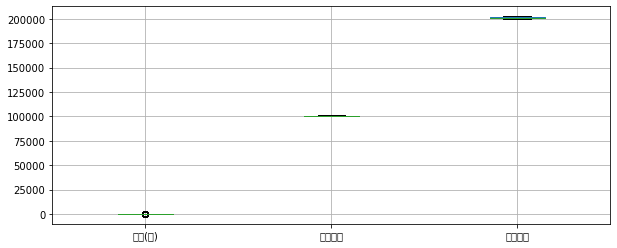

In [9]:
# 이상치 확인
df_raw.boxplot(figsize=(10,4))

# 3. 컬럼 별 정리

### '판매단가'

In [11]:
df_raw['판매단가']= df_raw['판매단가'].replace(',','', regex=True).astype(int)
df_raw['판매단가']

0         39900
1         39900
2         39900
3         39900
4         39900
          ...  
38299    148000
38300    178000
38301    168000
38302    158000
38303    148000
Name: 판매단가, Length: 35379, dtype: int32

### '취급액'

In [12]:
df_raw[' 취급액 ']= df_raw[' 취급액 '].replace(',','', regex=True).astype(int)
df_raw[' 취급액 ']

0          2099000
1          4371000
2          3262000
3          6955000
4          6672000
           ...    
38299     10157000
38300     50929000
38301    104392000
38302     13765000
38303     46608000
Name:  취급액 , Length: 35379, dtype: int32

### '방송일시'

In [13]:
year_month_day = df_raw["방송일시"].str.split(" ", n=2, expand=True)
df_raw['날짜'] = year_month_day[0].to_frame()
df_raw['시간'] = year_month_day[1].to_frame()

df_raw.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,시간
0,2019-01-01 6:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,2019-01-01,6:00
1,2019-01-01 6:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,2019-01-01,6:00
2,2019-01-01 6:20,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,2019-01-01,6:20
3,2019-01-01 6:20,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,2019-01-01,6:20
4,2019-01-01 6:40,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,2019-01-01,6:40


In [14]:
# df_raw = df_raw.drop(['방송일시', '날짜'], axis=1)

hour = df_raw["시간"].str.split(":", n=2, expand=True)
df_raw['시'] = hour[0].to_frame()
df_raw['분'] = hour[1].to_frame()

df_raw = df_raw.drop(['시간'], axis=1)

df_raw['시']= df_raw['시'].astype(int)
df_raw['분']= df_raw['분'].astype(int)

df_raw.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,시,분
0,2019-01-01 6:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,2019-01-01,6,0
1,2019-01-01 6:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,2019-01-01,6,0
2,2019-01-01 6:20,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,2019-01-01,6,20
3,2019-01-01 6:20,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,2019-01-01,6,20
4,2019-01-01 6:40,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,2019-01-01,6,40


In [15]:
year_month_day = df_raw["방송일시"].str.split("-", n=3, expand=True)
df_raw['년'] = year_month_day[0].to_frame()
df_raw['월'] = year_month_day[1].to_frame()
df_raw['일'] = year_month_day[1].to_frame()

df_raw['년']= df_raw['년'].astype(int)
df_raw['월']= df_raw['월'].astype(int)
df_raw['일']= df_raw['일'].astype(int)

df_raw = df_raw.drop(['년','방송일시','날짜'], axis=1)
df_raw.head()

,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,시,분,월,일
0,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,6,0,1,1
1,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,6,0,1,1
2,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,6,20,1,1
3,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,6,20,1,1
4,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,6,40,1,1


In [16]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35379 entries, 0 to 38303
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   노출(분)   35379 non-null  int32 
 1   마더코드    35379 non-null  int64 
 2   상품코드    35379 non-null  int64 
 3   상품명     35379 non-null  object
 4   상품군     35379 non-null  object
 5   판매단가    35379 non-null  int32 
 6    취급액    35379 non-null  int32 
 7   시       35379 non-null  int32 
 8   분       35379 non-null  int32 
 9   월       35379 non-null  int32 
 10  일       35379 non-null  int32 
dtypes: int32(7), int64(2), object(2)
memory usage: 2.3+ MB


### '상품군'

In [17]:
df_raw['상품군'].value_counts()

주방      6571
가전      5163
의류      4331
속옷      3910
농수축     3884
잡화      3694
생활용품    2769
가구      2302
이미용     1305
건강기능     786
침구       664
Name: 상품군, dtype: int64

In [19]:
df_dummy = pd.get_dummies(df_raw['상품군'])
df_dummy = df_raw.join(df_dummy.add_prefix('상품군_'))

In [20]:
df_dummy = df_dummy.drop(['상품군'], axis=1)
df_dummy.head()

,노출(분),마더코드,상품코드,상품명,판매단가,취급액,시,분,월,일,...,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구
0,20,100346,201072,테이트 남성 셀린니트3종,39900,2099000,6,0,1,1,...,0,0,0,0,0,1,0,0,0,0
1,20,100346,201079,테이트 여성 셀린니트3종,39900,4371000,6,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,20,100346,201072,테이트 남성 셀린니트3종,39900,3262000,6,20,1,1,...,0,0,0,0,0,1,0,0,0,0
3,20,100346,201079,테이트 여성 셀린니트3종,39900,6955000,6,20,1,1,...,0,0,0,0,0,1,0,0,0,0
4,20,100346,201072,테이트 남성 셀린니트3종,39900,6672000,6,40,1,1,...,0,0,0,0,0,1,0,0,0,0


In [21]:
df_raw = df_dummy
df_raw.head()

,노출(분),마더코드,상품코드,상품명,판매단가,취급액,시,분,월,일,...,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구
0,20,100346,201072,테이트 남성 셀린니트3종,39900,2099000,6,0,1,1,...,0,0,0,0,0,1,0,0,0,0
1,20,100346,201079,테이트 여성 셀린니트3종,39900,4371000,6,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,20,100346,201072,테이트 남성 셀린니트3종,39900,3262000,6,20,1,1,...,0,0,0,0,0,1,0,0,0,0
3,20,100346,201079,테이트 여성 셀린니트3종,39900,6955000,6,20,1,1,...,0,0,0,0,0,1,0,0,0,0
4,20,100346,201072,테이트 남성 셀린니트3종,39900,6672000,6,40,1,1,...,0,0,0,0,0,1,0,0,0,0


### '상품명'

#### 1. 성별
- 무관 : 0  
- 여성 : 1  
- 남성 : 2

In [22]:
# 상품명 성별 포함 고려해 새로운 column 추가하기
condition_list=[
    (df_raw['상품명'].str.contains('여성|브라|오모떼|보정팬티|뷰티')),
    (df_raw['상품명'].str.contains('남성'))
]
value_list=['여', '남']
df_raw['성별']=np.select(condition_list,value_list)
df_raw.head()

,노출(분),마더코드,상품코드,상품명,판매단가,취급액,시,분,월,일,...,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,성별
0,20,100346,201072,테이트 남성 셀린니트3종,39900,2099000,6,0,1,1,...,0,0,0,0,1,0,0,0,0,남
1,20,100346,201079,테이트 여성 셀린니트3종,39900,4371000,6,0,1,1,...,0,0,0,0,1,0,0,0,0,여
2,20,100346,201072,테이트 남성 셀린니트3종,39900,3262000,6,20,1,1,...,0,0,0,0,1,0,0,0,0,남
3,20,100346,201079,테이트 여성 셀린니트3종,39900,6955000,6,20,1,1,...,0,0,0,0,1,0,0,0,0,여
4,20,100346,201072,테이트 남성 셀린니트3종,39900,6672000,6,40,1,1,...,0,0,0,0,1,0,0,0,0,남


In [23]:
df_dummy = pd.get_dummies(df_raw['성별'])
df_dummy = df_raw.join(df_dummy.add_prefix('성별_'))

df_dummy = df_dummy.drop(['성별'], axis=1)

df_raw = df_dummy
df_raw.head()

,노출(분),마더코드,상품코드,상품명,판매단가,취급액,시,분,월,일,...,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,성별_0,성별_남,성별_여
0,20,100346,201072,테이트 남성 셀린니트3종,39900,2099000,6,0,1,1,...,0,0,1,0,0,0,0,0,1,0
1,20,100346,201079,테이트 여성 셀린니트3종,39900,4371000,6,0,1,1,...,0,0,1,0,0,0,0,0,0,1
2,20,100346,201072,테이트 남성 셀린니트3종,39900,3262000,6,20,1,1,...,0,0,1,0,0,0,0,0,1,0
3,20,100346,201079,테이트 여성 셀린니트3종,39900,6955000,6,20,1,1,...,0,0,1,0,0,0,0,0,0,1
4,20,100346,201072,테이트 남성 셀린니트3종,39900,6672000,6,40,1,1,...,0,0,1,0,0,0,0,0,1,0


#### 2. 무이자/일시불
- 무관 : 0  
- 무이자 : 1  
- 일시불 : 2

In [24]:
condition_list=[
    (df_raw['상품명'].str.contains('무이자')),
    (df_raw['상품명'].str.contains('일시불'))
]
value_list=['무이자', '일시불']
df_raw['무이자or일시불']=np.select(condition_list,value_list)
df_raw.head()

,노출(분),마더코드,상품코드,상품명,판매단가,취급액,시,분,월,일,...,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불
0,20,100346,201072,테이트 남성 셀린니트3종,39900,2099000,6,0,1,1,...,0,1,0,0,0,0,0,1,0,0
1,20,100346,201079,테이트 여성 셀린니트3종,39900,4371000,6,0,1,1,...,0,1,0,0,0,0,0,0,1,0
2,20,100346,201072,테이트 남성 셀린니트3종,39900,3262000,6,20,1,1,...,0,1,0,0,0,0,0,1,0,0
3,20,100346,201079,테이트 여성 셀린니트3종,39900,6955000,6,20,1,1,...,0,1,0,0,0,0,0,0,1,0
4,20,100346,201072,테이트 남성 셀린니트3종,39900,6672000,6,40,1,1,...,0,1,0,0,0,0,0,1,0,0


In [25]:
df_dummy = pd.get_dummies(df_raw['무이자or일시불'])
df_dummy = df_raw.join(df_dummy.add_prefix('무이자or일시불='))

df_dummy = df_dummy.drop(['무이자or일시불'], axis=1)

df_raw = df_dummy
df_raw.head()

,노출(분),마더코드,상품코드,상품명,판매단가,취급액,시,분,월,일,...,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불
0,20,100346,201072,테이트 남성 셀린니트3종,39900,2099000,6,0,1,1,...,0,0,0,0,0,1,0,1,0,0
1,20,100346,201079,테이트 여성 셀린니트3종,39900,4371000,6,0,1,1,...,0,0,0,0,0,0,1,1,0,0
2,20,100346,201072,테이트 남성 셀린니트3종,39900,3262000,6,20,1,1,...,0,0,0,0,0,1,0,1,0,0
3,20,100346,201079,테이트 여성 셀린니트3종,39900,6955000,6,20,1,1,...,0,0,0,0,0,0,1,1,0,0
4,20,100346,201072,테이트 남성 셀린니트3종,39900,6672000,6,40,1,1,...,0,0,0,0,0,1,0,1,0,0


#### 3. 계절
- 무관 : 0  
- 여름 : 1  
- 겨울 : 2

In [26]:
condition_list=[
    (df_raw['상품명'].str.contains('여름')),
    (df_raw['상품명'].str.contains('겨울|니트|기모|온수|단열|패딩|무스탕|방한|덕다운|히터|스웨터|롱패딩'))
]
value_list=['여름', '겨울']
df_raw['계절']=np.select(condition_list,value_list)
df_raw.head()

,노출(분),마더코드,상품코드,상품명,판매단가,취급액,시,분,월,일,...,상품군_잡화,상품군_주방,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불,계절
0,20,100346,201072,테이트 남성 셀린니트3종,39900,2099000,6,0,1,1,...,0,0,0,0,1,0,1,0,0,겨울
1,20,100346,201079,테이트 여성 셀린니트3종,39900,4371000,6,0,1,1,...,0,0,0,0,0,1,1,0,0,겨울
2,20,100346,201072,테이트 남성 셀린니트3종,39900,3262000,6,20,1,1,...,0,0,0,0,1,0,1,0,0,겨울
3,20,100346,201079,테이트 여성 셀린니트3종,39900,6955000,6,20,1,1,...,0,0,0,0,0,1,1,0,0,겨울
4,20,100346,201072,테이트 남성 셀린니트3종,39900,6672000,6,40,1,1,...,0,0,0,0,1,0,1,0,0,겨울


In [27]:
df_dummy = pd.get_dummies(df_raw['계절'])
df_dummy = df_raw.join(df_dummy.add_prefix('계절_'))

df_dummy = df_dummy.drop(['계절'], axis=1)

df_raw = df_dummy
df_raw.head()

,노출(분),마더코드,상품코드,상품명,판매단가,취급액,시,분,월,일,...,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불,계절_0,계절_겨울,계절_여름
0,20,100346,201072,테이트 남성 셀린니트3종,39900,2099000,6,0,1,1,...,0,0,1,0,1,0,0,0,1,0
1,20,100346,201079,테이트 여성 셀린니트3종,39900,4371000,6,0,1,1,...,0,0,0,1,1,0,0,0,1,0
2,20,100346,201072,테이트 남성 셀린니트3종,39900,3262000,6,20,1,1,...,0,0,1,0,1,0,0,0,1,0
3,20,100346,201079,테이트 여성 셀린니트3종,39900,6955000,6,20,1,1,...,0,0,0,1,1,0,0,0,1,0
4,20,100346,201072,테이트 남성 셀린니트3종,39900,6672000,6,40,1,1,...,0,0,1,0,1,0,0,0,1,0


In [28]:
df_raw = df_raw.drop(['상품명'], axis=1)

In [29]:
df = df_raw
pd.set_option('display.max_columns', 100)
df.head()

,노출(분),마더코드,상품코드,판매단가,취급액,시,분,월,일,상품군_가구,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불,계절_0,계절_겨울,계절_여름
0,20,100346,201072,39900,2099000,6,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
1,20,100346,201079,39900,4371000,6,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0
2,20,100346,201072,39900,3262000,6,20,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
3,20,100346,201079,39900,6955000,6,20,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0
4,20,100346,201072,39900,6672000,6,40,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0


# 4. scale 변환

#### 1) scale 변환 : 평균, 표준편차 기준

In [30]:
df_y = df[' 취급액 ']
df_x = df.drop(' 취급액 ', axis=1, inplace=False)

In [31]:
df_scale_std=scale(df_x)
df_scale_std=pd.DataFrame(df_scale_std, columns=df_x.columns)
df_scale_std.head()

,노출(분),마더코드,상품코드,판매단가,시,분,월,일,상품군_가구,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불,계절_0,계절_겨울,계절_여름
0,-0.10915,-0.193142,-0.211097,-0.55549,-1.234828,-1.245633,-1.617393,-1.617393,-0.263809,-0.413364,-0.150736,-0.351171,-0.291398,-0.35249,2.677458,-0.195701,-0.341446,-0.477594,-0.138301,-2.323533,3.564010,-0.301442,0.674291,-0.430195,-0.430564,-4.48012,4.531354,-0.031915
1,-0.10915,-0.193142,-0.201628,-0.55549,-1.234828,-1.245633,-1.617393,-1.617393,-0.263809,-0.413364,-0.150736,-0.351171,-0.291398,-0.35249,2.677458,-0.195701,-0.341446,-0.477594,-0.138301,-2.323533,-0.280583,3.317392,0.674291,-0.430195,-0.430564,-4.48012,4.531354,-0.031915
2,-0.10915,-0.193142,-0.211097,-0.55549,-1.234828,-0.025233,-1.617393,-1.617393,-0.263809,-0.413364,-0.150736,-0.351171,-0.291398,-0.35249,2.677458,-0.195701,-0.341446,-0.477594,-0.138301,-2.323533,3.564010,-0.301442,0.674291,-0.430195,-0.430564,-4.48012,4.531354,-0.031915
3,-0.10915,-0.193142,-0.201628,-0.55549,-1.234828,-0.025233,-1.617393,-1.617393,-0.263809,-0.413364,-0.150736,-0.351171,-0.291398,-0.35249,2.677458,-0.195701,-0.341446,-0.477594,-0.138301,-2.323533,-0.280583,3.317392,0.674291,-0.430195,-0.430564,-4.48012,4.531354,-0.031915
4,-0.10915,-0.193142,-0.211097,-0.55549,-1.234828,1.195167,-1.617393,-1.617393,-0.263809,-0.413364,-0.150736,-0.351171,-0.291398,-0.35249,2.677458,-0.195701,-0.341446,-0.477594,-0.138301,-2.323533,3.564010,-0.301442,0.674291,-0.430195,-0.430564,-4.48012,4.531354,-0.031915


In [32]:
#scale 변환결과 확인: 요약통계량:pandas.DataFrame.describe()
df_scale_desc = df_scale_std.describe()
df_scale_desc.round(3)

,노출(분),마더코드,상품코드,판매단가,시,분,월,일,상품군_가구,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불,계절_0,계절_겨울,계절_여름
count,35379.000,35379.000,35379.000,35379.000,35379.000,35379.000,35379.000,35379.000,35379.000,35379.000,35379.000,35379.000,35379.000,35379.000,35379.000,35379.000,35379.000,35379.000,35379.000,35379.000,35379.000,35379.000,35379.000,35379.000,35379.000,35379.000,35379.000,35379.000
mean,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-5.935,-1.566,-1.661,-0.599,-2.148,-1.246,-1.617,-1.617,-0.264,-0.413,-0.151,-0.351,-0.291,-0.352,-0.373,-0.196,-0.341,-0.478,-0.138,-2.324,-0.281,-0.301,-1.483,-0.430,-0.431,-4.480,-0.221,-0.032
25%,-0.109,-0.951,-0.891,-0.525,-0.778,-1.246,-0.734,-0.734,-0.264,-0.413,-0.151,-0.351,-0.291,-0.352,-0.373,-0.196,-0.341,-0.478,-0.138,0.430,-0.281,-0.301,-1.483,-0.430,-0.431,0.223,-0.221,-0.032
50%,-0.109,-0.165,-0.072,-0.461,0.135,-0.025,-0.145,-0.145,-0.264,-0.413,-0.151,-0.351,-0.291,-0.352,-0.373,-0.196,-0.341,-0.478,-0.138,0.430,-0.281,-0.301,0.674,-0.430,-0.431,0.223,-0.221,-0.032
75%,-0.109,0.831,0.881,0.018,0.897,1.195,0.738,0.738,-0.264,-0.413,-0.151,-0.351,-0.291,-0.352,-0.373,-0.196,-0.341,-0.478,-0.138,0.430,-0.281,-0.301,0.674,-0.430,-0.431,0.223,-0.221,-0.032
max,6.364,1.803,1.738,12.040,1.353,1.805,1.622,1.622,3.791,2.419,6.634,2.848,3.432,2.837,2.677,5.110,2.929,2.094,7.231,0.430,3.564,3.317,0.674,2.325,2.323,0.223,4.531,31.333


# 5. 모델 생성

In [33]:
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 의사결정나무_예측
from sklearn.tree import DecisionTreeRegressor
# 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor as RFR
# 그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor as GBR
# xgboost
from xgboost import XGBRegressor as XGB
# lightgbm
from lightgbm import LGBMRegressor as LGB


# 평가함수
from statsmodels.tools.eval_measures import rmse
#데이터 분할:train, test
from sklearn.model_selection import train_test_split

In [36]:
df_x = df_scale_std

## 1) 데이터 구성하기

In [37]:
df_train_x,df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y,test_size = 0.05/2, shuffle = True, random_state = 1234)

print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data X size : {}'.format(df_test_y.shape))

train data X size : (34494, 28)
train data Y size : (34494,)
test data X size : (885, 28)
test data X size : (885,)


In [38]:
df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_train_x, df_train_y ,test_size = 0.05/1.95, shuffle = True, random_state = 1234)

print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('validation data X size : {}'.format(df_val_x.shape))
print('validation data X size : {}'.format(df_val_y.shape))

train data X size : (33609, 28)
train data Y size : (33609,)
validation data X size : (885, 28)
validation data X size : (885,)


In [39]:
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('validation data X size : {}'.format(df_val_x.shape))
print('validation data X size : {}'.format(df_val_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data X size : {}'.format(df_test_y.shape))

train data X size : (33609, 28)
train data Y size : (33609,)
validation data X size : (885, 28)
validation data X size : (885,)
test data X size : (885, 28)
test data X size : (885,)


## 2) 모델 생성

In [40]:
lr_model = LinearRegression()
lr_model.fit(df_train_x,df_train_y)

# Train 데이터 설명력
print('Score on training set:{:.3f}'.format(lr_model.score(df_train_x,df_train_y)))
# validation 데이터 설명력
print('Score on validation set:{:.3f}'.format(lr_model.score(df_val_x,df_val_y)))
# Test 데이터 설명력
print('Score on test set:{:.3f}'.format(lr_model.score(df_test_x,df_test_y)))

Score on training set:0.313
Score on validation set:0.328
Score on test set:0.356


In [41]:
dt_model = DecisionTreeRegressor(random_state=1234)
dt_model.fit(df_train_x,df_train_y)

# Train 데이터 설명력
print('Score on training set:{:.3f}'.format(dt_model.score(df_train_x,df_train_y)))
# validation 데이터 설명력
print('Score on validation set:{:.3f}'.format(dt_model.score(df_val_x,df_val_y)))
# Test 데이터 설명력
print('Score on test set:{:.3f}'.format(dt_model.score(df_test_x,df_test_y)))

Score on training set:0.940
Score on validation set:0.456
Score on test set:0.599


In [42]:
rf_model = RFR(random_state=1234, n_estimators=1000)
rf_model.fit(df_train_x,df_train_y)
#Train 데이터 설명력
print("Score on training set:{:.3f}".format(rf_model.score(df_train_x,df_train_y)))
# validation 데이터 설명력
print('Score on validation set:{:.3f}'.format(rf_model.score(df_val_x,df_val_y)))
#test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_model.score(df_test_x,df_test_y)))

Score on training set:0.915
Score on validation set:0.673
Score on test set: 0.742


In [43]:
gb_model=GBR(random_state=1234)
gb_model.fit(df_train_x,df_train_y)
#Train 데이터 설명력
print("Score on training set:{:.3f}".format(gb_model.score(df_train_x,df_train_y)))
# validation 데이터 설명력
print('Score on validation set:{:.3f}'.format(gb_model.score(df_val_x,df_val_y)))
#test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_model.score(df_test_x,df_test_y)))

Score on training set:0.499
Score on validation set:0.509
Score on test set: 0.531


In [44]:
XGB_model=XGB(min_child_weight = 11,max_depth=5,n_estimators=1200, n_jobs = -1)
XGB_model.fit(df_train_x,df_train_y)
#Train 데이터 설명력
print("Score on training set:{:.3f}".format(XGB_model.score(df_train_x,df_train_y)))
# validation 데이터 설명력
print('Score on validation set:{:.3f}'.format(XGB_model.score(df_val_x,df_val_y)))
#test 데이터 설명력
print("Score on test set: {:.3f}".format(XGB_model.score(df_test_x,df_test_y)))

Score on training set:0.862
Score on validation set:0.768
Score on test set: 0.806


In [45]:
LGB_model=LGB(min_child_weight = 30,n_estimators=1500)
LGB_model.fit(df_train_x,df_train_y)
#Train 데이터 설명력
print("Score on training set:{:.3f}".format(LGB_model.score(df_train_x,df_train_y)))
# validation 데이터 설명력
print('Score on validation set:{:.3f}'.format(LGB_model.score(df_val_x,df_val_y)))
#test 데이터 설명력
print("Score on test set: {:.3f}".format(LGB_model.score(df_test_x,df_test_y)))

Score on training set:0.844
Score on validation set:0.759
Score on test set: 0.781


#  6. 모델 평가

In [46]:
#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [47]:
#모델리스트, 그래프를 그리기 생성목적
models=["LR","DT","RF","GB","XGB","LGB"]
#평가 리스트 초기화
mse,mae=[],[]

#### LinearRegression

In [48]:
#예측
lr_y_pred=lr_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y,lr_y_pred))

mae.append(mean_absolute_error(df_test_y,lr_y_pred))

#### 의사결정나무

In [49]:
#예측
dt_y_pred=dt_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y,dt_y_pred))

mae.append(mean_absolute_error(df_test_y,dt_y_pred))

#### 랜덤포레스트

In [50]:
#예측
rf_y_pred=rf_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y,rf_y_pred))

mae.append(mean_absolute_error(df_test_y,rf_y_pred))


#### 그래디언트 부스팅

In [51]:
#예측
gb_y_pred=gb_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y,gb_y_pred))

mae.append(mean_absolute_error(df_test_y,gb_y_pred))


#### xgboost

In [52]:
#예측
XGB_y_pred=XGB_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y,XGB_y_pred))

mae.append(mean_absolute_error(df_test_y,XGB_y_pred))


#### lightgbm

In [53]:
#예측
LGB_y_pred=LGB_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y,LGB_y_pred))

mae.append(mean_absolute_error(df_test_y,LGB_y_pred))


#### mse, mae 그래프

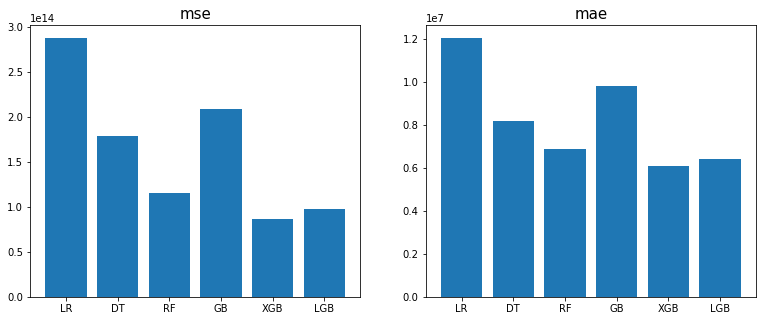

In [54]:
fig,ax=plt.subplots(1,2,figsize=(13,5))

ax[0,].bar(models, mse)
ax[0,].set_title("mse").set_fontsize(15)


ax[1,].bar(models, mae)
ax[1,].set_title("mae").set_fontsize(15)

# 7. 평가 데이터

## 1) 데이터 불러오기 & 정보 확인

In [55]:
df_raw = pd.read_csv("평가데이터.csv", encoding='cp949')
df_raw=df_raw[['방송일시', '노출(분)', '마더코드', '상품코드','상품명','상품군', '판매단가']]
df_raw.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가
0,2020-06-01 6:20,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,"59,800"
1,2020-06-01 6:40,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,"59,800"
2,2020-06-01 7:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,"59,800"
3,2020-06-01 7:20,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,"69,900"
4,2020-06-01 7:40,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,"69,900"


## 2) 결측치,이상치 확인 및 처리

'판매단가'에서 ' - '로 되어 있는 행은 결측값으로 판단

In [56]:
# 결측치 개수 확인
df_raw.isnull().sum() 

방송일시        0
노출(분)    1111
마더코드        0
상품코드        0
상품명         0
상품군         0
판매단가      175
dtype: int64

### '노출(분)'

노출(분)에 대한 결측값은 바로 앞 행과 동시간대이므로  
==> 바로 앞 행 값으로 결측값 채우면 된다.

In [57]:
df_raw['노출(분)'] = df_raw['노출(분)'].fillna(method='ffill') # 앞 방향으로 채우기
df_raw['노출(분)']= df_raw['노출(분)'].astype(int)

### '판매단가'

In [58]:
df_raw = df_raw.dropna(axis=0)

df_raw.isnull().sum() 

방송일시     0
노출(분)    0
마더코드     0
상품코드     0
상품명      0
상품군      0
판매단가     0
dtype: int64

## 3) 컬럼 별 정리

### '판매단가'

In [59]:
df_raw['판매단가']= df_raw['판매단가'].replace(',','', regex=True).astype(int)

### '방송일시'

In [60]:
# 방송일시
df_raw['방송일시'] = pd.to_datetime(df_raw['방송일시'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df_raw['월']=df_raw['방송일시'].dt.month
df_raw['일']=df_raw['방송일시'].dt.day
df_raw['시']=df_raw['방송일시'].dt.hour
df_raw['분']=df_raw['방송일시'].dt.minute
del df_raw['방송일시']

In [61]:
### '상품군'

In [62]:
df_dummy = pd.get_dummies(df_raw['상품군'])
df_dummy = df_raw.join(df_dummy.add_prefix('상품군_'))
df_dummy = df_dummy.drop(['상품군'], axis=1)
df_raw = df_dummy

### '상품명'
#### 1. 성별
- 무관 : 0  
- 여성 : 1  
- 남성 : 2

In [63]:
# 상품명 성별 포함 고려해 새로운 column 추가하기
condition_list=[
    (df_raw['상품명'].str.contains('여성|브라|오모떼|보정팬티|뷰티')),
    (df_raw['상품명'].str.contains('남성'))
]
value_list=['여', '남']
df_raw['성별']=np.select(condition_list,value_list)

df_dummy = pd.get_dummies(df_raw['성별'])
df_dummy = df_raw.join(df_dummy.add_prefix('성별_'))

df_dummy = df_dummy.drop(['성별'], axis=1)

df_raw = df_dummy

#### 2. 무이자/일시불
- 무관 : 0  
- 무이자 : 1  
- 일시불 : 2

In [64]:
condition_list=[
    (df_raw['상품명'].str.contains('무이자')),
    (df_raw['상품명'].str.contains('일시불'))
]
value_list=['무이자', '일시불']
df_raw['무이자or일시불']=np.select(condition_list,value_list)

df_dummy = pd.get_dummies(df_raw['무이자or일시불'])
df_dummy = df_raw.join(df_dummy.add_prefix('무이자or일시불='))

df_dummy = df_dummy.drop(['무이자or일시불'], axis=1)

df_raw = df_dummy

#### 3. 계절
- 무관 : 0  
- 여름 : 1  
- 겨울 : 2

In [65]:
condition_list=[
    (df_raw['상품명'].str.contains('여름')),
    (df_raw['상품명'].str.contains('겨울|니트|기모|온수|단열|패딩|무스탕|방한|덕다운|히터|스웨터|롱패딩'))
]
value_list=['여름', '겨울']
df_raw['계절']=np.select(condition_list,value_list)

df_dummy = pd.get_dummies(df_raw['계절'])
df_dummy = df_raw.join(df_dummy.add_prefix('계절_'))

df_dummy = df_dummy.drop(['계절'], axis=1)

df_raw = df_dummy
df_raw = df_raw.drop(['상품명'], axis=1)
df = df_raw

## 4) scale 변환 : 평균, 표준편차 기준

In [66]:
df_scale_std=scale(df)
df_scale_std

array([[ 0.01547952,  1.04422579,  1.01931308, ...,  0.06661734,
        -0.0470534 , -0.0470534 ],
       [ 0.01547952,  1.04422579,  1.01931308, ...,  0.06661734,
        -0.0470534 , -0.0470534 ],
       [ 0.01547952,  1.04422579,  1.01931308, ...,  0.06661734,
        -0.0470534 , -0.0470534 ],
       ...,
       [-3.05330632, -1.09278606, -1.16083118, ...,  0.06661734,
        -0.0470534 , -0.0470534 ],
       [ 0.01547952, -0.46448131, -0.38872352, ...,  0.06661734,
        -0.0470534 , -0.0470534 ],
       [-1.21203482, -0.46448131, -0.38872352, ...,  0.06661734,
        -0.0470534 , -0.0470534 ]])

In [68]:
df_scale_std=pd.DataFrame(df_scale_std, columns=df_x.columns)

In [69]:
s_result = XGB_model.predict(df_scale_std)
print(len(s_result))

2716


In [70]:
# np.array를 list로 변환해 dataframe으로

pred_df_s=pd.DataFrame(data={'취급액':s_result.tolist()})
pred_df_s

,취급액
0,-16814724.00
1,-16814724.00
2,-14753872.00
3,3016597.25
4,3016597.25
...,...
2711,18088802.00
2712,16102098.00
2713,23272366.00
2714,14965814.00


In [72]:
pred_df_s.to_csv('취급액 예측.csv', index=False, encoding='cp949')